## Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Undefitting and Overfitting : KNN

> ## Table Of Contents

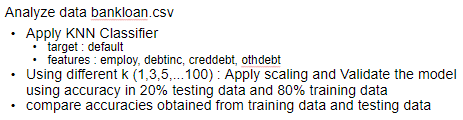

In [3]:
bankloan = pd.read_csv('../data/bankloan.csv')
bankloan

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0     41   3      17       12     176      9.3  11.359392  5.008608        1
1     27   1      10        6      31     17.3   1.362202  4.000798        0
2     40   1      15       14      55      5.5   0.856075  2.168925        0
3     41   1      15       14     120      2.9   2.658720  0.821280        0
4     24   2       2        0      28     17.3   1.787436  3.056564        1
..   ...  ..     ...      ...     ...      ...        ...       ...      ...
695   36   2       6       15      27      4.6   0.262062  0.979938        1
696   29   2       6        4      21     11.5   0.369495  2.045505        0
697   33   1      15        3      32      7.6   0.491264  1.940736        0
698   45   1      19       22      77      8.4   2.302608  4.165392        0
699   37   1      12       14      44     14.7   2.994684  3.473316        0

[700 rows x 9 columns]

In [5]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = 'default'

In [6]:
X = bankloan[fitur]
y = bankloan[target]

> ## Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 2020
)

> ## Standardization Process

In [8]:
X_train

employ  debtinc  creddebt   othdebt
382       2     16.0  4.003840  3.356160
344      18     13.4  4.521696  5.394304
265       7      6.4  0.630784  0.777216
52       16     12.9  3.032016  3.675984
370      13      9.6  1.875168  3.020832
..      ...      ...       ...       ...
476       3     16.3  0.352080  2.581920
135       6      2.2  0.452694  0.801306
506      19      4.7  0.397385  3.785615
684      18     10.5  0.840315  4.724685
584       0     33.4  2.801592  3.210408

[560 rows x 4 columns]

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

> ## Selection process factor K

In [18]:
k = range(1,100,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_scaled, y_train)
    
    y_pred_train = knn_i.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn_i.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

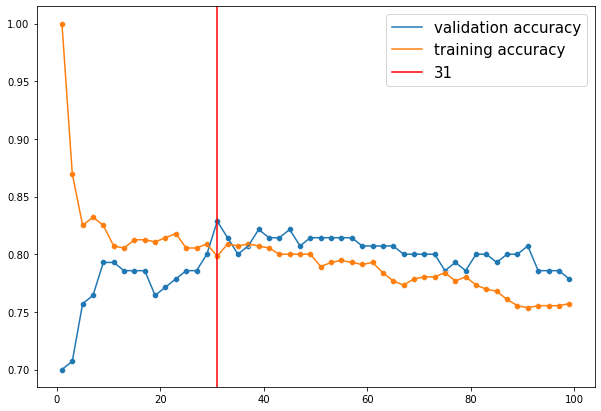

In [23]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, label='validation accuracy')
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies, label='training accuracy')
sns.scatterplot(k, training_accuracies)
plt.axvline(31, color='red', label=best_k)
plt.legend(fontsize=15)
plt.show()

In [20]:
print('best k:', best_k)
print('accuracy:', score)

best k: 31
accuracy: 0.8285714285714286


1. The best factor k for this case is 31 with 82.86 % accuracy
1. For k = 1, the KNN method achieve 100 accuracy in training set but very bad accuracy in validation set
1. For k below 31, the ML method is getting overfitting while for k greater than 31 the ML method is getting underfitting

# Model Complexity : Decision Tree

> ## Table Of Contents

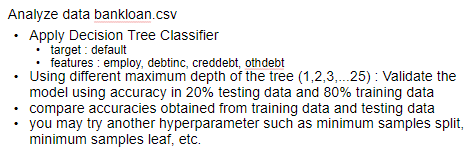

In [31]:
depths = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
    dtc_i = DecisionTreeClassifier(
        criterion='gini',
        max_depth = i,
    )
    dtc_i.fit(X_train, y_train)
    
    y_pred_train = dtc_i.predict(X_train)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = dtc_i.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i

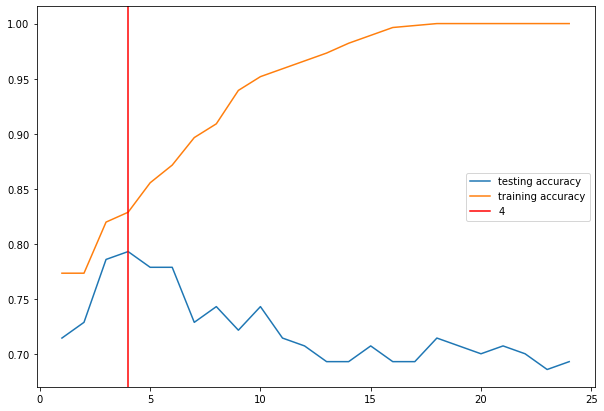

In [37]:
plt.figure(figsize=(10,7))
sns.lineplot(depths, testing_accuracies)
sns.lineplot(depths, training_accuracies)
plt.axvline(best_depth, color='red')
plt.legend(['testing accuracy', 'training accuracy', best_depth])
plt.show()

In [35]:
print('best maximum depth:', best_depth)
print('accuracy:', score)
print('accuracy in train:', training_accuracies[3])

best maximum depth: 4
accuracy: 0.7928571428571428
accuracy in train: 0.8285714285714286


In [36]:
training_accuracies[3]-score

0.03571428571428581

## Ridge

In [38]:
np.random.seed(2020)
data = {
    'x': np.arange(10),
    'y': np.arange(10)+np.random.randn(10)
}

df = pd.DataFrame(data)
df

x         y
0  0 -1.768846
1  1  1.075552
2  2  0.869370
3  3  2.348570
4  4  3.106884
5  5  3.725899
6  6  5.938846
7  7  7.064514
8  8  8.410113
9  9  8.427118

In [39]:
copy_df = df.copy()

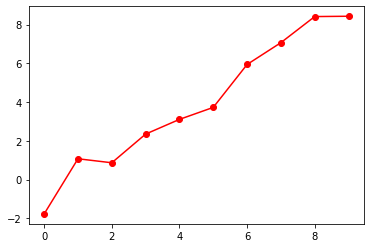

In [40]:
plt.plot(df['x'], df['y'], 'ro-')
plt.show()

## 80 : 20

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
Xtr, Xts, ytr, yts = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=1)
lr8020 = LinearRegression().fit(Xtr, ytr)
df['pred_8020'] = lr8020.predict(df[['x']])
df

x         y  pred_8020
0  0 -1.768846  -1.198615
1  1  1.075552  -0.037131
2  2  0.869370   1.124353
3  3  2.348570   2.285837
4  4  3.106884   3.447321
5  5  3.725899   4.608804
6  6  5.938846   5.770288
7  7  7.064514   6.931772
8  8  8.410113   8.093256
9  9  8.427118   9.254740

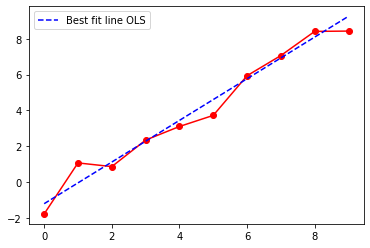

In [45]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best fit line OLS')
plt.legend()
plt.show()

In [47]:
print('coef lr8020:', lr8020.coef_)
print('intercept lr8020:', lr8020.intercept_)

coef lr8020: [1.1614839]
intercept lr8020: -1.1986150688604313


## 2 Data

In [48]:
df.iloc[:2]

x         y  pred_8020
0  0 -1.768846  -1.198615
1  1  1.075552  -0.037131

In [49]:
lr2 = LinearRegression().fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['pred_2'] = lr2.predict(df[['x']])
df

x         y  pred_8020     pred_2
0  0 -1.768846  -1.198615  -1.768846
1  1  1.075552  -0.037131   1.075552
2  2  0.869370   1.124353   3.919950
3  3  2.348570   2.285837   6.764348
4  4  3.106884   3.447321   9.608746
5  5  3.725899   4.608804  12.453144
6  6  5.938846   5.770288  15.297542
7  7  7.064514   6.931772  18.141940
8  8  8.410113   8.093256  20.986338
9  9  8.427118   9.254740  23.830736

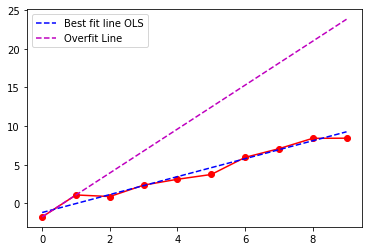

In [50]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best fit line OLS')
plt.plot(df['x'], df['pred_2'], 'm--', label='Overfit Line')
plt.legend()
plt.show()

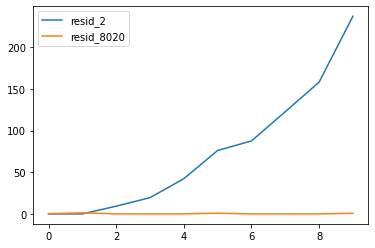

In [54]:
resid2 = (df['y'] - df['pred_2'])**2
resid8020 = (df['y'] - df['pred_8020'])**2
plt.plot(range(len(resid)), resid2)
plt.plot(range(len(resid)), resid8020)
plt.legend(['resid_2', 'resid_8020'])
plt.show()

## Ridge 2 Data

coef lr 2 data: [2.84439798]
coef lr 8020: [1.1614839]
coef ridge 2 data: [1.07742348]
intercept ridge 2 data: -0.8853584552112049


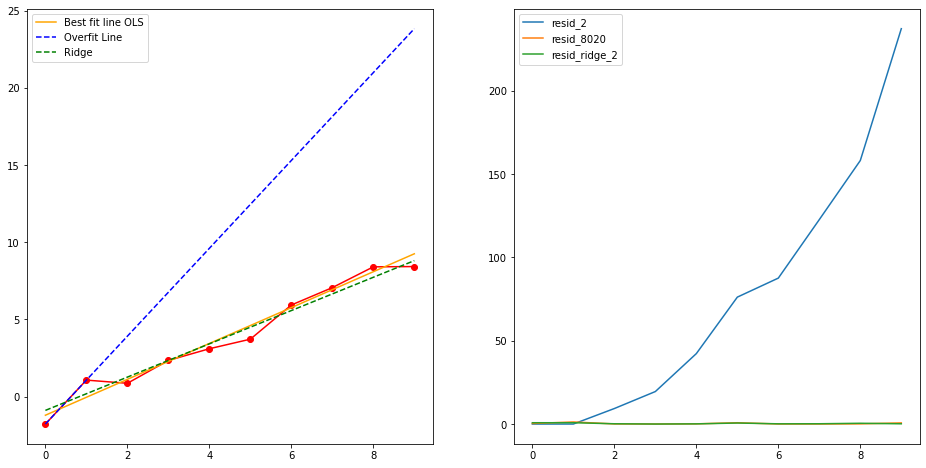

In [72]:
ridge_2 = Ridge(alpha=0.82)
ridge_2.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['pred_ridge'] = ridge_2.predict(df[['x']])
print('coef lr 2 data:', lr2.coef_)
print('coef lr 8020:', lr8020.coef_)
print('coef ridge 2 data:', ridge_2.coef_)
print('intercept ridge 2 data:', ridge_2.intercept_)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], color='orange', label='Best fit line OLS')
plt.plot(df['x'], df['pred_2'], 'b--', label='Overfit Line')
plt.plot(df['x'], df['pred_ridge'], 'g--', label='Ridge')
plt.legend()

plt.subplot(122)
resid2 = (df['y'] - df['pred_2'])**2
resid8020 = (df['y'] - df['pred_8020'])**2
resid_ridge_2 = (df['y'] - df['pred_ridge'])**2
plt.plot(range(len(resid)), resid2)
plt.plot(range(len(resid)), resid8020)
plt.plot(range(len(resid)), resid_ridge_2)
plt.legend(['resid_2', 'resid_8020', 'resid_ridge_2'])
plt.show()

In [73]:
print('rmse lr 8020:', np.sqrt(mean_squared_error(df['y'], df['pred_8020']))) # linear regresi dilatih dengan 8 data
print('rmse ridge 2 data:', np.sqrt(mean_squared_error(df['y'], df['pred_ridge']))) # ridge dilatih dengan 2 data saja

rmse lr 8020: 0.5795676716002185
rmse ridge 2 data: 0.5765830129566663


## Lasso

coef lr 2 data: [2.84439798]
coef lr 8020: [1.1614839]
coef ridge 2 data: [1.07742348]
coef lasso 2 data: [1.08439798]
intercept ridge 2 data: -0.8853584552112049


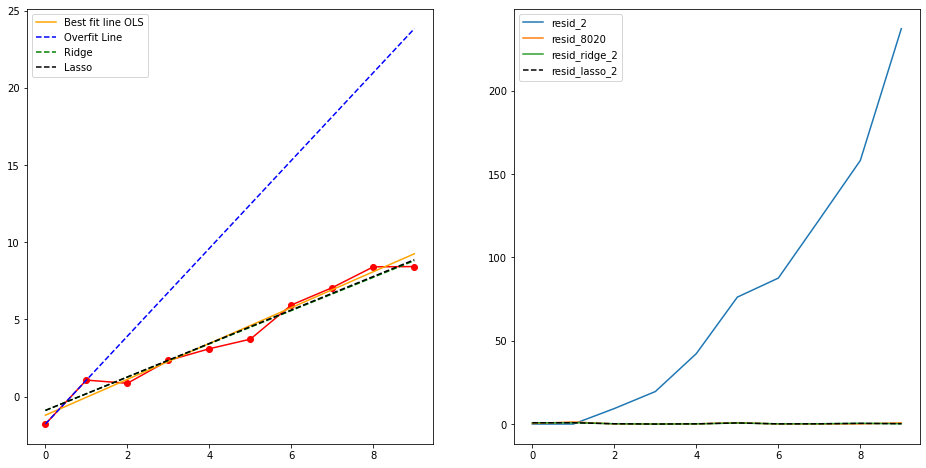

In [80]:
lasso_2 = Lasso(alpha=0.44)
lasso_2.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['pred_lasso'] = lasso_2.predict(df[['x']])
print('coef lr 2 data:', lr2.coef_)
print('coef lr 8020:', lr8020.coef_)
print('coef ridge 2 data:', ridge_2.coef_)
print('coef lasso 2 data:', lasso_2.coef_)
print('intercept ridge 2 data:', ridge_2.intercept_)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], color='orange', label='Best fit line OLS')
plt.plot(df['x'], df['pred_2'], 'b--', label='Overfit Line')
plt.plot(df['x'], df['pred_ridge'], 'g--', label='Ridge')
plt.plot(df['x'], df['pred_lasso'], 'k--', label='Lasso')
plt.legend()

plt.subplot(122)
resid2 = (df['y'] - df['pred_2'])**2
resid8020 = (df['y'] - df['pred_8020'])**2
resid_ridge_2 = (df['y'] - df['pred_ridge'])**2
resid_lasso_2 = (df['y'] - df['pred_lasso'])**2
plt.plot(range(len(resid)), resid2)
plt.plot(range(len(resid)), resid8020)
plt.plot(range(len(resid)), resid_ridge_2)
plt.plot(range(len(resid)), resid_lasso_2, 'k--')
plt.legend(['resid_2', 'resid_8020', 'resid_ridge_2', 'resid_lasso_2'])
plt.show()

In [83]:
from sklearn.datasets import load_boston

In [84]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [85]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [86]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [87]:
y = pd.Series(data['target'])
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 1899
)

## Ridge

In [95]:
hyperparam_alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in hyperparam_alpha:
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X_train, y_train)
    
    y_predict_train = ridgereg.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test = ridgereg.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)
    
    if score > -mse_score:
        score = mse_score
        best_alpha = i
    

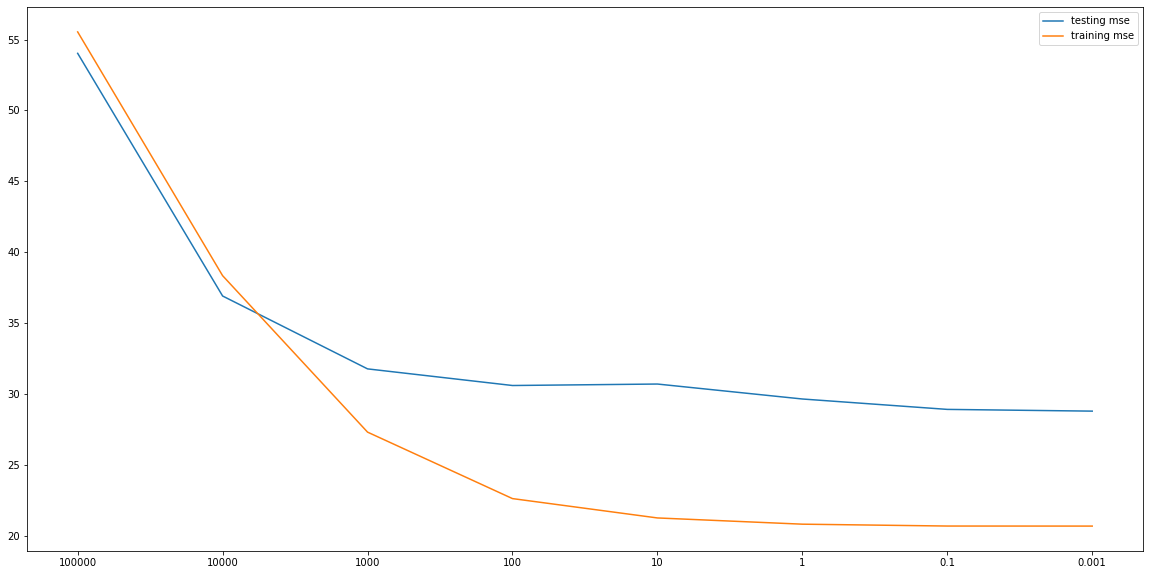

In [96]:
plt.figure(figsize=(20,10))
sns.lineplot(range(len(hyperparam_alpha)), testing_mse)
sns.lineplot(range(len(hyperparam_alpha)), training_mse)
plt.legend(['testing mse', 'training mse'])
plt.xticks(range(len(hyperparam_alpha)), hyperparam_alpha)
plt.show()

In [97]:
print('best alpha:', best_alpha)
print('best mse:', score)

best alpha: 0.001
best mse: 28.778402778052975


In [98]:
ridgereg = Ridge(alpha=best_alpha)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.001)

In [99]:
coef_ridgereg = pd.DataFrame({
    'feature_names': list(X),
    'feature_coef': ridgereg.coef_
})
coef_ridgereg

feature_names  feature_coef
0           CRIM     -0.123098
1             ZN      0.027489
2          INDUS      0.040234
3           CHAS      1.676822
4            NOX    -14.800396
5             RM      4.324093
6            AGE      0.002115
7            DIS     -1.253837
8            RAD      0.328548
9            TAX     -0.014321
10       PTRATIO     -0.943733
11             B      0.009574
12         LSTAT     -0.560351

## Lasso

In [100]:
hyperparam_alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in hyperparam_alpha:
    lassoreg = Lasso(alpha=i)
    lassoreg.fit(X_train, y_train)
    
    y_predict_train = lassoreg.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test = lassoreg.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)
    
    if score > -mse_score:
        score = mse_score
        best_alpha = i
    

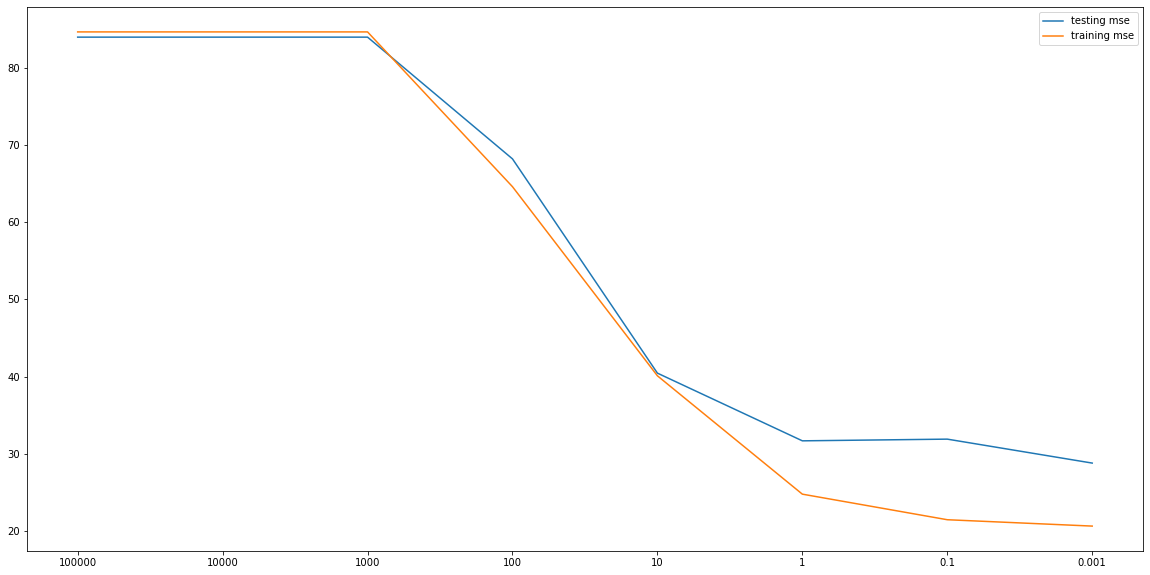

In [101]:
plt.figure(figsize=(20,10))
sns.lineplot(range(len(hyperparam_alpha)), testing_mse)
sns.lineplot(range(len(hyperparam_alpha)), training_mse)
plt.legend(['testing mse', 'training mse'])
plt.xticks(range(len(hyperparam_alpha)), hyperparam_alpha)
plt.show()

In [102]:
print('best alpha:', best_alpha)
print('best mse:', score)

best alpha: 0.001
best mse: 28.820511284098718


In [103]:
lassoreg = Lasso(alpha=best_alpha)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [107]:
print(lassoreg.sparse_coef_)

  (0, 0)	-0.12292020836105584
  (0, 1)	0.027514884864227387
  (0, 2)	0.038745547967384074
  (0, 3)	1.655565710668745
  (0, 4)	-14.470963259199673
  (0, 5)	4.324769756971685
  (0, 6)	0.0018681211945761281
  (0, 7)	-1.2486657762863176
  (0, 8)	0.3278834891228574
  (0, 9)	-0.014347462288279756
  (0, 10)	-0.9400100202339197
  (0, 11)	0.009591468615696064
  (0, 12)	-0.5610929078396057


In [108]:
coef_lassoreg = pd.DataFrame({
    'feature_names': list(X),
    'feature_coef': lassoreg.coef_
})
coef_lassoreg

feature_names  feature_coef
0           CRIM     -0.122920
1             ZN      0.027515
2          INDUS      0.038746
3           CHAS      1.655566
4            NOX    -14.470963
5             RM      4.324770
6            AGE      0.001868
7            DIS     -1.248666
8            RAD      0.327883
9            TAX     -0.014347
10       PTRATIO     -0.940010
11             B      0.009591
12         LSTAT     -0.561093

## NOTES: Scaler process

In [ ]:
xi - min(x)
------------- = .......
max(x) - min(x)

In [ ]:
xi - mean(x)
------------- = ......
    s

In [10]:
X_train.describe()

employ     debtinc    creddebt     othdebt
count  560.000000  560.000000  560.000000  560.000000
mean     8.564286   10.303571    1.598840    3.117190
std      6.631049    6.853099    2.149230    3.349780
min      0.000000    0.400000    0.011696    0.045584
25%      3.000000    5.175000    0.369854    1.049471
50%      7.000000    8.800000    0.890707    2.038053
75%     13.000000   14.300000    1.978249    4.005186
max     31.000000   41.300000   20.561310   27.033600

In [13]:
df_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
display(X_train)
display(df_train)

employ  debtinc  creddebt   othdebt
382       2     16.0  4.003840  3.356160
344      18     13.4  4.521696  5.394304
265       7      6.4  0.630784  0.777216
52       16     12.9  3.032016  3.675984
370      13      9.6  1.875168  3.020832
..      ...      ...       ...       ...
476       3     16.3  0.352080  2.581920
135       6      2.2  0.452694  0.801306
506      19      4.7  0.397385  3.785615
684      18     10.5  0.840315  4.724685
584       0     33.4  2.801592  3.210408

[560 rows x 4 columns]

employ   debtinc  creddebt   othdebt
0    0.064516  0.381418  0.194269  0.122668
1    0.580645  0.317848  0.219469  0.198189
2    0.225806  0.146699  0.030127  0.027110
3    0.516129  0.305623  0.146977  0.134519
4    0.419355  0.224939  0.090682  0.110243
..        ...       ...       ...       ...
555  0.096774  0.388753  0.016564  0.093980
556  0.193548  0.044010  0.021460  0.028002
557  0.612903  0.105134  0.018769  0.138581
558  0.580645  0.246944  0.040323  0.173377
559  0.000000  0.806846  0.135764  0.117268

[560 rows x 4 columns]

In [14]:
display(X_train.describe())
display(df.describe())

employ     debtinc    creddebt     othdebt
count  560.000000  560.000000  560.000000  560.000000
mean     8.564286   10.303571    1.598840    3.117190
std      6.631049    6.853099    2.149230    3.349780
min      0.000000    0.400000    0.011696    0.045584
25%      3.000000    5.175000    0.369854    1.049471
50%      7.000000    8.800000    0.890707    2.038053
75%     13.000000   14.300000    1.978249    4.005186
max     31.000000   41.300000   20.561310   27.033600

employ     debtinc    creddebt     othdebt
count  560.000000  560.000000  560.000000  560.000000
mean     0.276267    0.242141    0.077235    0.113814
std      0.213905    0.167557    0.104587    0.124121
min      0.000000    0.000000    0.000000    0.000000
25%      0.096774    0.116748    0.017429    0.037198
50%      0.225806    0.205379    0.042775    0.073828
75%      0.419355    0.339853    0.095698    0.146717
max      1.000000    1.000000    1.000000    1.000000

In [16]:
df_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)
display(X_test)
display(df_test)

employ  debtinc  creddebt   othdebt
118       0     12.8  1.088640  2.367360
309       4     10.1  1.060500  1.464500
339       4     14.2  0.437360  3.538640
686       1      7.9  0.853200  0.726800
639       7      9.9  1.694880  2.265120
..      ...      ...       ...       ...
597       5     14.8  2.594144  1.549856
58       18      2.5  1.485000  1.015000
467       6      4.4  0.237864  1.258136
148      11      8.4  0.681912  2.090088
681       4      9.7  0.200984  1.157016

[140 rows x 4 columns]

employ   debtinc  creddebt   othdebt
0    0.000000  0.303178  0.052407  0.086030
1    0.129032  0.237164  0.051038  0.052576
2    0.129032  0.337408  0.020714  0.129430
3    0.032258  0.183374  0.040950  0.025241
4    0.225806  0.232274  0.081908  0.082242
..        ...       ...       ...       ...
135  0.161290  0.352078  0.125669  0.055739
136  0.580645  0.051345  0.071695  0.035920
137  0.193548  0.097800  0.011006  0.044929
138  0.354839  0.195599  0.032615  0.075756
139  0.129032  0.227384  0.009211  0.041182

[140 rows x 4 columns]

In [17]:
display(X_test.describe())
display(df_test.describe())

employ     debtinc    creddebt     othdebt
count  140.000000  140.000000  140.000000  140.000000
mean     7.685714   10.088571    1.372402    2.822284
std      6.743060    6.744346    1.980871    3.025677
min      0.000000    0.900000    0.024528    0.156300
25%      2.000000    5.000000    0.365480    1.014857
50%      6.500000    8.150000    0.769344    1.630258
75%     11.000000   13.525000    1.630117    3.388997
max     31.000000   30.700000   14.596200   18.257382

employ     debtinc    creddebt     othdebt
count  140.000000  140.000000  140.000000  140.000000
mean     0.247926    0.236884    0.066216    0.102886
std      0.217518    0.164898    0.096395    0.112112
min      0.000000    0.012225    0.000624    0.004102
25%      0.064516    0.112469    0.017216    0.035915
50%      0.209677    0.189487    0.036869    0.058718
75%      0.354839    0.320905    0.078757    0.123885
max      1.000000    0.740831    0.709722    0.674811